In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import  XGBClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score
from catboost import CatBoostClassifier, Pool

In [2]:
data_file = pd.read_csv("dataset/train.csv")
test_file = pd.read_csv("dataset/test.csv")

In [3]:
data = data_file.copy()
test = test_file.copy()
data_file.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
data.drop(data.iloc[:, 4:6], inplace = True, axis = 1)
data.drop(data.iloc[:, 0:3], inplace = True, axis = 1)

test.drop(test.iloc[:, 4:6], inplace = True, axis = 1)
test.drop(test.iloc[:, 0:3], inplace = True, axis = 1)

In [5]:
test.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,38.0,10,121263.62,1,1.0,0.0,139431.00


In [6]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  int64  
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  int64  
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   Exited           165034 non-null  int64  
dtypes: float64(5), int64(4)
memory usage: 11.3 MB


In [8]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [9]:
data.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
data.dropna()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,30.0,7,161533.00,1,0.0,1.0,71173.03,0


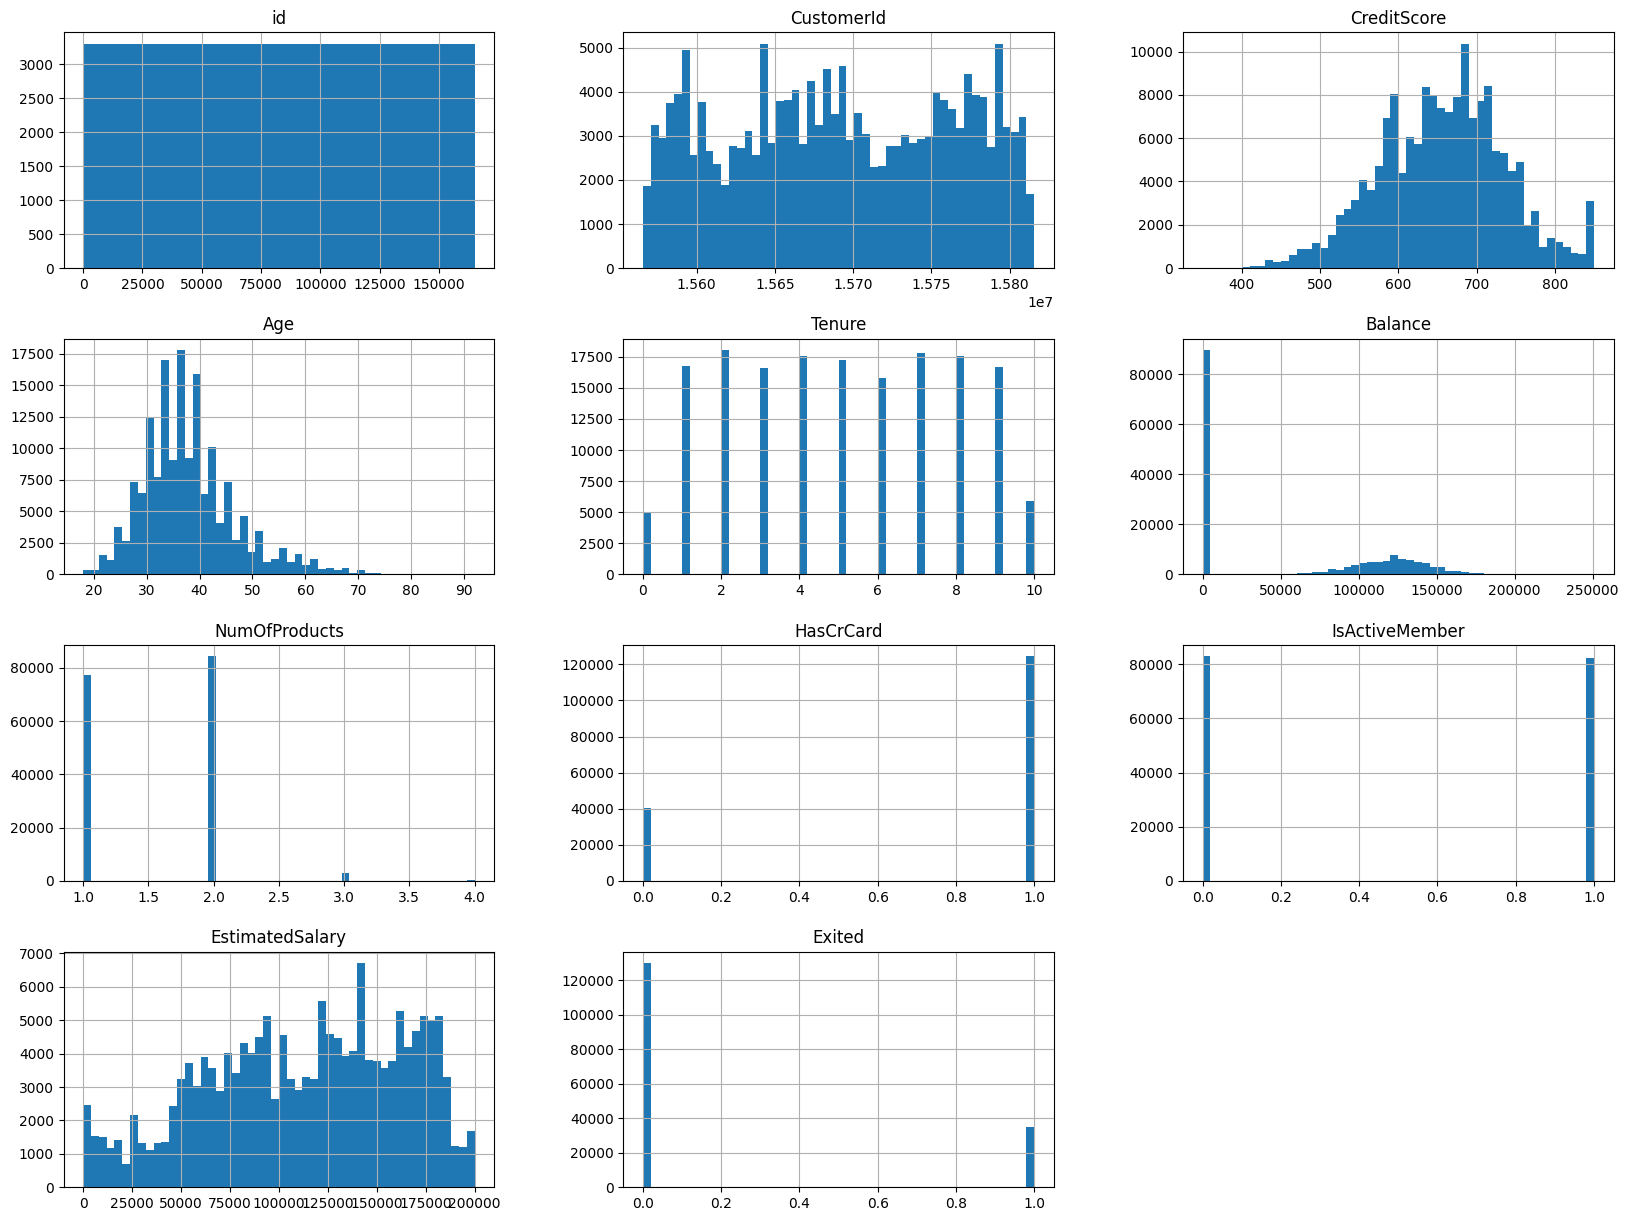

In [11]:
data_file.hist(figsize = (20, 15), bins = 50)
plt.show()

In [12]:
corr_cols = data[["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "EstimatedSalary"]]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


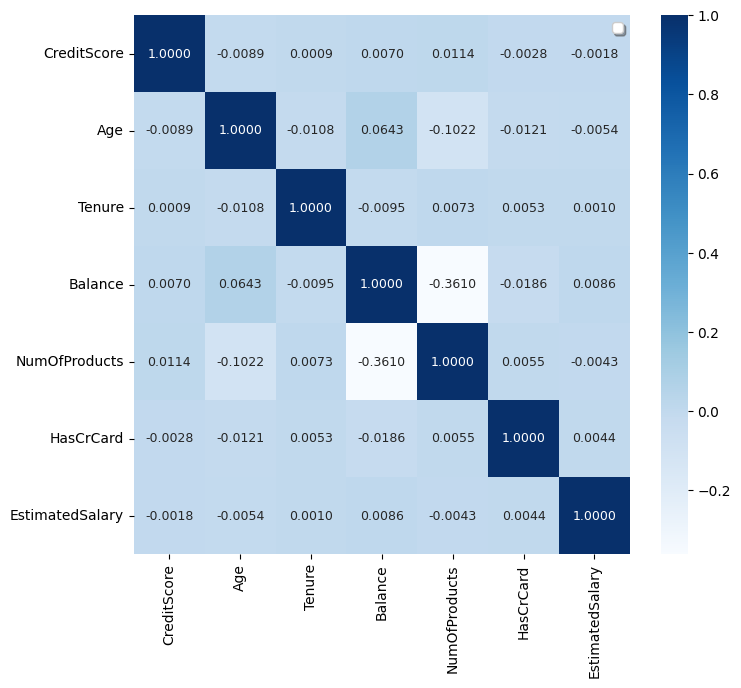

In [13]:
corrmat = corr_cols.corr()
plt.figure(figsize=(8, 7))

hm = sns.heatmap(corrmat,
                 annot=True,
                 fmt=".4f",
                 annot_kws={'size': 9},
                 cmap="Blues")

# Add legend
legend = plt.legend(loc="upper right", fancybox=True, shadow=True, ncol=3)
#legend.set_title("Correlation Coefficients")
for label in legend.get_texts():
    label.set_fontsize(11)
    label.set_ha("center")

In [14]:
X = data.drop("Exited", axis = 1)
y = data.Exited

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 7)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(123775, 8)
(41259, 8)
(123775,)
(41259,)


In [16]:
LG_model = LGBMClassifier(random_state = 7, verbose = 0)
LG_model.fit(X_train, y_train)

LGBMClassifier(random_state=7, verbose=0)

In [17]:
y_pred = LG_model.predict(X_test)
print("Training AUC of model: ", accuracy_score(y_pred, y_test))

Training AUC of model:  0.8555466686056376


In [18]:
test_pred = LG_model.predict(test)
print(test_pred)

[0 1 0 ... 0 0 0]


In [19]:
XG_model = XGBClassifier()
XG_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [20]:
y_pred = XG_model.predict(X_test)
print("AUC of Xgb model: ", accuracy_score(y_pred, y_test))

AUC of Xgb model:  0.8551104001551176


In [21]:
test_pred = XG_model.predict(test)
print(test_pred)

[0 1 0 ... 0 0 0]


In [22]:
# Stratified K-fold validation with Catboost

cat_features = np.where(X.dtypes != np.float64)[0]
feat_cols = X.columns
folds = StratifiedKFold(n_splits = 4, random_state = 7, shuffle = True)
test_preds = np.empty((4, len(test)))
auc_vals=[]

for n_fold, (train_idx, valid_idx) in enumerate(folds.split(X, y)):
    
    X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
    X_test, y_test = X.iloc[valid_idx], y.iloc[valid_idx]
    
    train_pool = Pool(X_train, y_train, cat_features = cat_features)
    test_pool = Pool(X_test, y_test,cat_features = cat_features)
    
    clf = CatBoostClassifier(
    eval_metric='AUC',
    learning_rate=0.001,
    iterations = 4000)
    clf.fit(train_pool, eval_set = test_pool, verbose = 300)
    
    y_pred_val = clf.predict_proba(X_test[feat_cols])[:,1]
    auc_val = roc_auc_score(y_test, y_pred_val)
    print("AUC for fold ",n_fold,": ",auc_val)
    auc_vals.append(auc_val)
    
    y_pred_test = clf.predict_proba(test[feat_cols])[:,1]
    test_preds[n_fold, :] = y_pred_test
    print("----------------")

0:	test: 0.8622603	best: 0.8622603 (0)	total: 280ms	remaining: 18m 41s
300:	test: 0.8692940	best: 0.8695613 (18)	total: 41.2s	remaining: 8m 26s
600:	test: 0.8703976	best: 0.8703976 (600)	total: 1m 28s	remaining: 8m 22s
900:	test: 0.8709517	best: 0.8709517 (900)	total: 2m 16s	remaining: 7m 49s
1200:	test: 0.8715505	best: 0.8715506 (1199)	total: 3m 5s	remaining: 7m 12s
1500:	test: 0.8722024	best: 0.8722024 (1500)	total: 3m 53s	remaining: 6m 28s
1800:	test: 0.8730232	best: 0.8730232 (1800)	total: 4m 40s	remaining: 5m 42s
2100:	test: 0.8735109	best: 0.8735109 (2100)	total: 5m 28s	remaining: 4m 56s
2400:	test: 0.8738984	best: 0.8738984 (2400)	total: 6m 13s	remaining: 4m 8s
2700:	test: 0.8742697	best: 0.8742697 (2700)	total: 6m 58s	remaining: 3m 21s
3000:	test: 0.8745539	best: 0.8745539 (3000)	total: 7m 43s	remaining: 2m 34s
3300:	test: 0.8747976	best: 0.8747976 (3300)	total: 8m 28s	remaining: 1m 47s
3600:	test: 0.8750090	best: 0.8750090 (3600)	total: 9m 13s	remaining: 1m 1s
3900:	test: 0.87

In [23]:
"Mean AUC: ", np.mean(auc_vals)

('Mean AUC: ', 0.8754490786164166)